# What is Pandas?

Pandas is one if the most important libraries for data analysis in Python. This package is build on top of NumPy and Matplotlib. What makes Pandas so useful is the data structures associated with it, primarily the `Series` and `DataFrame`. As one of the most popular data wrangling packages, Pandas works well with many other data science modules inside the Python ecosystem. 

-----

Some of the things you can do with Pandas:

- Data cleansing
- Data fill
- Data normalization
- Merges and joins
- Data visualization
- Statistical analysis
- Data inspection
- Loading and saving data

## Install Pandas

*On Windows*

`pip install pandas`

*On Mac or Linux*

`pip3 install pandas`


In [ ]:
# Run shell commands in Jupyter Notebooks with the "!" symbol
!pip install pandas

In [ ]:
import pandas as pd

# Identify version 
# Many times pandas has error when you update to a newer version of pandas. For cases like these, it is recommended you use a vertualizing software like Anaconda 
print(pd.__version__)

#### Series Data Structure

This structure is the column of a table. It takes in a list or a dictionary and you can do multiple operations of this structure

In [ ]:
# Create a Series

# This takes in a list
series_obj = pd.Series([1,"Venkata",1000.01,"Alex"])
print(series_obj)

In [ ]:
# Notice in the indexing on the left (in the above)
# You can change the indexing

series_obj_letter_index = pd.Series([1,"Venkata",1000.01,"Alex"],index=["a","b","c","d"])
print(series_obj_letter_index)

In [ ]:
# Create a Series Object with dictioinaries
# The Keys are the indexes. This is different from a DataFrame where the keys are the columns names (down below)

series_obj_dict = pd.Series(
    {
        'a': 1, 
        'b': "Venkata",
        'c': 1000.1, 
        'd': "Alex" 
     }
)
print(series_obj_dict)

In [ ]:
# You can index the Series using the index on the left

print(series_obj[1])
print(series_obj_letter_index['b'])
print(series_obj_dict['b'])

In [ ]:
# Identify the indexes
print('Indexes for series_obj:', series_obj.index )
print('Indexes for series_obj_letter_index:', series_obj_letter_index.index )

##### Indexing using a Boolean Mask

In [ ]:
series_obj = pd.Series(range(10), dtype='int16')
print(series_obj, '\n')

# Create the Boolean Mask for values greater than 4
print('Boolean Mask \n', series_obj > 4, '\n')

# Indexing using the Boolean Mask
# You get a Series with a subset of the original Series
print('Indexing with Mask \n', series_obj[series_obj > 4], '\n')

#### Assignment and Math with Series

In [ ]:
# Assignment
series_obj[series_obj > 4] = 'abc'
print(series_obj)

In [ ]:
# Reseting the Series
series_obj[5:] = range(5,10)

# Math
print(series_obj)
print(series_obj + 10)
print(series_obj - 10)
print(series_obj * 10)
print(series_obj / 10)

In [ ]:
series_obj[0] = None
series_obj.isnull()

In [ ]:
import matplotlib.pyplot as plt
# Notice the type of value_counts is a Series
print(series_obj.value_counts())
print(type(series_obj.value_counts()))

# Plot the Data
# Notice how this is a Matplotlib plot? You can do matplotlib functions on it
ax = series_obj.value_counts().plot.bar()
print(type(ax))

ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("title")
plt.show()

## DataFrame

In [ ]:
# Creating DataFrames
# How to make DataFrames
import pandas as pd

df = pd.DataFrame(
    [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
    ],
    columns=['a', 'b', 'c'])

# Note: the numbers are arranged in a different order (transvere) due to keeping the columns consistent
df2 = pd.DataFrame({
    'a': [1,4,7],
    'b': [2,5,8],
    'c': [3,6,9]
})
print(df)
print(df2)

### Before trying to analyze the data, we need to know some basic fuctions of the DataFrame

In [257]:
grades_df = pd.DataFrame(
    [
        [1, 'MCB2400', 96],
        [2, 'CSE3500', 48],
        [3, 'HIST4000', 84],
        [4, 'SOCI1000', 100]
    ],
    columns=['Student ID', 'Class', 'Grade'],
    index=None
)

hours_df = pd.DataFrame(
    [
        [1, 40, 1],
        [2, 100, 1],
        [3, 29, 4],
        [4,10, 0]
    ],
    columns=['Student ID', 'Hours Spent Per Week', 'Homework Assignments Per Week']
)

print(grades_df)
print(hours_df)

   Student ID     Class  Grade
0           1   MCB2400     96
1           2   CSE3500     48
2           3  HIST4000     84
3           4  SOCI1000    100
   Student ID  Hours Spent Per Week  Homework Assignments Per Week
0           1                    40                              1
1           2                   100                              1
2           3                    29                              4
3           4                    10                              0


In [259]:
# Indexing multiple columns
grades_df[ ['Student ID', 'Class'] ].head()

,Student ID,Class
0,1,MCB2400
1,2,CSE3500
2,3,HIST4000
3,4,SOCI1000


In [261]:
# You can use dot notation to index the columns
grades_df.Class.head()

0     MCB2400
1     CSE3500
2    HIST4000
3    SOCI1000
Name: Class, dtype: object

In [262]:
# Change the index name
grades_df.index.name = 'index'
grades_df.head()

,Student ID,Class,Grade
index,,,
0,1,MCB2400,96
1,2,CSE3500,48
2,3,HIST4000,84
3,4,SOCI1000,100


In [264]:
# index rows
# .iloc -> Takes in a number or a list of numbers
# .loc -> takes in index values
grades_df.iloc[range(0,3)]

,Student ID,Class,Grade
index,,,
0,1,MCB2400,96
1,2,CSE3500,48
2,3,HIST4000,84


In [266]:
# To demonstrate the difference between .loc and .iloc, I need to create a different DataFrame with a different index
# Creating a copy
grades_df_loc = grades_df.copy()
# Changing the index
grades_df_loc.index =['zero', 'one','two','three']
grades_df_loc

,Student ID,Class,Grade
zero,1,MCB2400,96
one,2,CSE3500,48
two,3,HIST4000,84
three,4,SOCI1000,100


In [267]:
# Using this as a comparison
grades_df_loc.iloc[[0,1]]

,Student ID,Class,Grade
zero,1,MCB2400,96
one,2,CSE3500,48


In [269]:
# Using .loc throws an error
try:
    grades_df_loc.loc[[0,1]]
except Exception as e:
    print(e)


"None of [Int64Index([0, 1], dtype='int64')] are in the [index]"


In [270]:
# .loc requires the index values
grades_df_loc.loc[['one','two']]

,Student ID,Class,Grade
one,2,CSE3500,48
two,3,HIST4000,84


In [271]:
# Index a range
grades_df_loc.loc['one':'three']

,Student ID,Class,Grade
one,2,CSE3500,48
two,3,HIST4000,84
three,4,SOCI1000,100


In [274]:
# Boolen Maps
print(grades_df['Grade'] > 50, '\n')
grades_df[grades_df['Grade'] > 50]

index
0     True
1    False
2     True
3     True
Name: Grade, dtype: bool 



,Student ID,Class,Grade
index,,,
0,1,MCB2400,96
2,3,HIST4000,84
3,4,SOCI1000,100


In [275]:
# More complex Boolen Maps
grades_df[ (grades_df['Grade'] > 50) & (grades_df['Class'] == 'MCB2400') ].head()

,Student ID,Class,Grade
index,,,
0,1,MCB2400,96


In [297]:
# Adding columns to the DataFrame
grades_df['Department'] = 'Other'
grades_df

,Student ID,Class,Grade,Department
index,,,,
0,1,MCB2400,96,Other
1,2,CSE3500,48,Other
2,3,HIST4000,84,Other
3,4,SOCI1000,100,Other


In [299]:
# Changing values
grades_df['Department'].iloc[0:3] = 'Not Other'
grades_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Student ID,Class,Grade,Department
index,,,,
0,1,MCB2400,96,Not Other
1,2,CSE3500,48,Not Other
2,3,HIST4000,84,Not Other
3,4,SOCI1000,100,Other


In [301]:
# Remove a column
del grades_df['Department'] 
grades_df

,Student ID,Class,Grade
index,,,
0,1,MCB2400,96
1,2,CSE3500,48
2,3,HIST4000,84
3,4,SOCI1000,100


In [312]:
# Remove Rows
# Note, it returns a copy
print(grades_df_loc.__str__())
grades_df_loc.drop('one')

       Student ID     Class  Grade
zero            1   MCB2400     96
one             2   CSE3500     48
two             3  HIST4000     84
three           4  SOCI1000    100


,Student ID,Class,Grade
zero,1,MCB2400,96
two,3,HIST4000,84
three,4,SOCI1000,100


In [315]:
# Applying Functions
# Say I want the column for departments

# Create a new columns with a function applied to it
grades_df['Department'] = grades_df['Class'].apply(lambda x: x[0:3])

grades_df

,Student ID,Class,Grade,Department
index,,,,
0,1,MCB2400,96,MCB
1,2,CSE3500,48,CSE
2,3,HIST4000,84,HIS
3,4,SOCI1000,100,SOC


In [317]:
# That isn't perfect. Lets make a better function
import numpy as np

def department(CLASS):
    np_word = np.array(list(CLASS))
    final_word = ''.join(np_word[np.array([ not x.isnumeric() for x in np_word ])])
    if final_word == 'MCB':
        return 'Biology'
    elif final_word == 'CSE':
        return 'Engineering'
    elif final_word == 'HIST':
        return 'History'
    elif final_word == 'SOCI':
        return 'Sociology'
    else:
        return 'Other'

# .apply can take in a function
grades_df['Department'] = grades_df['Class'].apply(department)

grades_df
        

,Student ID,Class,Grade,Department
index,,,,
0,1,MCB2400,96,Biology
1,2,CSE3500,48,Engineering
2,3,HIST4000,84,History
3,4,SOCI1000,100,Sociology


In [328]:
# Sorting
grades_df.sort_values(by='Grade')

,Student ID,Class,Grade,Department
index,,,,
1,2,CSE3500,48,Engineering
2,3,HIST4000,84,History
0,1,MCB2400,96,Biology
3,4,SOCI1000,100,Sociology


In [336]:
# Unique values
print(hours_df)
print(hours_df['Homework Assignments Per Week'].unique())
# Count Values
hours_df['Homework Assignments Per Week'].value_counts()

   Student ID  Hours Spent Per Week  Homework Assignments Per Week
0           1                    40                              1
1           2                   100                              1
2           3                    29                              4
3           4                    10                              0
[1 4 0]


1    2
0    1
4    1
Name: Homework Assignments Per Week, dtype: int64

### Cleaning DataFrames

In [351]:
# Remove empty
grades_df_loc['Grade']['one'] = None

print(grades_df_loc)

print(grades_df_loc.isnull())

# Returns a copy
print(grades_df_loc.dropna())

# Fill
grades_df_loc.fillna(grades_df_loc['Grade'].mean())

       Student ID     Class  Grade
zero            1   MCB2400   96.0
one             2   CSE3500    NaN
two             3  HIST4000   84.0
three           4  SOCI1000  100.0
       Student ID  Class  Grade
zero        False  False  False
one         False  False   True
two         False  False  False
three       False  False  False
       Student ID     Class  Grade
zero            1   MCB2400   96.0
two             3  HIST4000   84.0
three           4  SOCI1000  100.0


,Student ID,Class,Grade
zero,1,MCB2400,96.000000
one,2,CSE3500,93.333333
two,3,HIST4000,84.000000
three,4,SOCI1000,100.000000


In [355]:
# Check for duplicates
# To append, notice I had to create a 2 dimentional array
grades_df_loc = grades_df_loc.append(pd.DataFrame([[4, 'SOCI1000', float(100)]], index=['three'], columns=['Student ID', 'Class', 'Grade']))
grades_df_loc

,Student ID,Class,Grade
zero,1,MCB2400,96.0
one,2,CSE3500,NaN
two,3,HIST4000,84.0
three,4,SOCI1000,100.0
three,4,SOCI1000,100.0


In [362]:
print(grades_df_loc.duplicated())
# Creates a copy. if not wanted, specify the inplace=True
grades_df_loc.drop_duplicates()

zero     False
one      False
two      False
three    False
three     True
dtype: bool


,Student ID,Class,Grade
zero,1,MCB2400,96.0
one,2,CSE3500,NaN
two,3,HIST4000,84.0
three,4,SOCI1000,100.0


### Merging DataFrames

In [364]:
pd.merge(grades_df, hours_df, on='Student ID')

,Student ID,Class,Grade,Department,Hours Spent Per Week,Homework Assignments Per Week
0,1,MCB2400,96.0,Biology,40,1
1,2,CSE3500,48.0,Engineering,100,1
2,3,HIST4000,84.0,History,29,4
3,4,SOCI1000,100.0,Sociology,10,0


### Stats and Arithmetic

In [318]:
series_1=pd.Series(range(4),
             index=["a","c","d","e"])
series_2=pd.Series(range(5),
             index=["a","c","e","f","g"])
print(series_1)
print(series_2)

a    0
c    1
d    2
e    3
dtype: int64
a    0
c    1
e    2
f    3
g    4
dtype: int64


In [319]:
# Add Series based on index
# This is the same thing that happens with adding DataFrames
series_1 + series_2

a    0.0
c    2.0
d    NaN
e    5.0
f    NaN
g    NaN
dtype: float64

In [320]:
# Differet form of adding
result_series = series_1.add(series_2, fill_value=0)
result_series

a    0.0
c    2.0
d    2.0
e    5.0
f    3.0
g    4.0
dtype: float64

In [324]:
# Mean based on the axis

print(grades_df.mean())
print(grades_df.mean(axis='index'))
print(grades_df.mean(axis='columns'))

Student ID     2.5
Grade         82.0
dtype: float64
Student ID     2.5
Grade         82.0
dtype: float64
index
0    48.5
1    25.0
2    43.5
3    52.0
dtype: float64


In [363]:
grades_df.sum()

Student ID                                    10
Class             MCB2400CSE3500HIST4000SOCI1000
Grade                                        328
Department    BiologyEngineeringHistorySociology
dtype: object

In [ ]:
# To understand more of the Data I am going to convert the data into numerical values
# First create a copy
df_copy = df.copy()
pd.unique(df['marital-status'])

In [ ]:
def changeOutput(x):
    if '<=50K' in x:
        return 0
    elif '>50K' in x:
        return 1

df_copy['salary'] = df_copy['salary'].apply(changeOutput)

In [ ]:
df_copy.head()

In [ ]:
df_copy['education'] = df_copy['education'].astype('category')
df_copy['education'] = df_copy['education'].apply(lambda x: x.cat.codes)
df_copy

In [ ]:
import numpy as np

np.array(df_copy['education'].dtype.categories).# index('10th')

#### However most of the time, you are not creating DataFrames, you import your data
### The Adult Data Set

The purpose of this dataset is given features, you are to predict if someone makes over 50k or less than 50k a year

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. Represents final weight, which is the number of units in the target population that the responding unit represents
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous. Number of years of education
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources other than wage/salary
- capital-loss: continuous. Income from investment sources other than wage/salary
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K


Source: https://archive.ics.uci.edu/ml/datasets/Adult


In [365]:
# I am importing Data from a csv. If you have an Excel sheet, use pd.read_excel()
# Returns a dataframe
# You know why I had to do the below?
df = pd.read_table('adult.data.csv', delimiter=',', header=None)
df.columns = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
              'capital-gain','capital-loss','hours-per-week','native-country','salary']
# View top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [366]:
# Cleaning
# Notice the space
df['salary'][0]

' <=50K'

In [367]:
df['salary'] = df['salary'].apply(lambda x: x.strip())
df['salary'][0]

'<=50K'

In [368]:
# Doing it for all other columns
df['workclass'] = df['workclass'].apply(lambda x: x.strip())
df['education'] = df['education'].apply(lambda x: x.strip())
df['marital-status'] = df['marital-status'].apply(lambda x: x.strip())
df['occupation'] = df['occupation'].apply(lambda x: x.strip())
df['relationship'] = df['relationship'].apply(lambda x: x.strip())
df['race'] = df['race'].apply(lambda x: x.strip())
df['sex'] = df['sex'].apply(lambda x: x.strip())
df['native-country'] = df['native-country'].apply(lambda x: x.strip())

In [369]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [371]:
# Check for missing Data
df.isnull() #.sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [374]:
# Check for duplicated
df.duplicated().sum()

24

In [375]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [378]:
# Understand the Data
# How many makes and females
df['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [383]:
# Average Age of for Males and Females
print(df[df['sex'] == 'Male']['age'].mean())

39.43605051664753


In [384]:
# Create groupby object
df_gender_group = df.groupby('sex')
print(df_gender_group)

In [387]:
df_gender_group.mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
sex,,,,,,
Female,36.864709,185713.506969,10.037168,568.885895,61.238803,36.415257
Male,39.436051,191791.077199,10.103881,1330.285832,100.282342,42.429667


In [388]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [391]:
# Representation of the Data Set
df['native-country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [393]:
df['education-num'].value_counts().sort_index()

1        50
2       166
3       332
4       645
5       514
6       933
7      1175
8       433
9     10494
10     7282
11     1382
12     1067
13     5353
14     1722
15      576
16      413
Name: education-num, dtype: int64

In [398]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_series = df[df.columns[:]].apply(le.fit_transform)

In [399]:
encoded_series

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


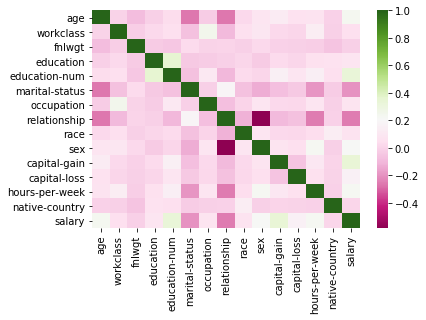

In [406]:
import seaborn as sns

sns.heatmap(encoded_series.corr(), cmap="PiYG")

In [413]:
(encoded_series.corr()['salary'] < 0.07) & (encoded_series.corr()['salary'] > -0.07)['salary']

age               False
workclass          True
fnlwgt             True
education         False
education-num     False
marital-status     True
occupation        False
relationship       True
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
Name: salary, dtype: bool

In [411]:
encoded_series.corr()['salary']

age               0.234131
workclass         0.051665
fnlwgt           -0.010605
education         0.079366
education-num     0.335272
marital-status   -0.199199
occupation        0.075419
relationship     -0.250948
race              0.071847
sex               0.215969
capital-gain      0.340019
capital-loss      0.162494
hours-per-week    0.232365
native-country    0.015618
salary            1.000000
Name: salary, dtype: float64

In [422]:
# certain columns do not seem required for predicting salary
del df['native-country']
del df['relationship']
del df['marital-status']
del df['fnlwgt']
del df['workclass']

In [424]:
# Features that seem important for predicting Salary
df.head()

,age,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,Bachelors,13,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Bachelors,13,Exec-managerial,White,Male,0,0,13,<=50K
2,38,HS-grad,9,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,11th,7,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Bachelors,13,Prof-specialty,Black,Female,0,0,40,<=50K


In [425]:
df_salary_group = df.groupby('salary')

In [426]:
df_salary_group.mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,
<=50K,36.787392,9.596081,148.884970,53.190258,38.842862
>50K,44.250925,11.612195,4007.164562,195.051282,45.473402


In [429]:
df_salary_group.describe().T

salary                       <=50K          >50K
age            count  24698.000000   7839.000000
               mean      36.787392     44.250925
               std       14.017335     10.520102
               min       17.000000     19.000000
               25%       25.000000     36.000000
               50%       34.000000     44.000000
               75%       46.000000     51.000000
               max       90.000000     90.000000
education-num  count  24698.000000   7839.000000
               mean       9.596081     11.612195
               std        2.434654      2.385181
               min        1.000000      2.000000
               25%        9.000000     10.000000
               50%        9.000000     12.000000
               75%       10.000000     13.000000
               max       16.000000     16.000000
capital-gain   count  24698.000000   7839.000000
               mean     148.884970   4007.164562
               std      963.557955  14572.097223
               min        0.000000      0.000000
               25%        0.000000      0.000000
               50%        0.000000      0.000000
               75%        0.000000      0.000000
               max    41310.000000  99999.000000
capital-loss   count  24698.000000   7839.000000
               mean      53.190258    195.051282
               std      310.890099    595.555395
               min        0.000000      0.000000
               25%        0.000000      0.000000
               50%        0.000000      0.000000
               75%        0.000000      0.000000
               max     4356.000000   3683.000000
hours-per-week count  24698.000000   7839.000000
               mean      38.842862     45.473402
               std       12.318286     11.014165
               min        1.000000      1.000000
               25%       35.000000     40.000000
               50%       40.000000     40.000000
               75%       40.000000     50.000000
               max       99.000000     99.000000

In [433]:
df_country_salary_group = df.groupby(['salary', 'occupation'])
df_country_salary_group.mean()

age  education-num  capital-gain  \
salary occupation                                                  
<=50K  ?                  39.179177       9.016344    158.483051   
       Adm-clerical       35.989267      10.016559    136.705305   
       Armed-Forces       28.250000       9.625000      0.000000   
       Craft-repair       37.653397       8.910900    148.225276   
       Exec-managerial    39.618979      10.839294    184.126848   
       Farming-fishing    40.492588       8.433295    265.746864   
       Handlers-cleaners  31.469213       8.457521    110.941543   
       Machine-op-inspct  37.054255       8.362079    156.249572   
       Other-service      34.653456       8.716233     80.555485   
       Priv-house-serv    41.917808       7.397260    112.753425   
       Prof-specialty     37.951712      12.378402    192.184372   
       Protective-serv    37.705479       9.842466    245.623288   
       Sales              34.780277       9.904012    134.014998   
       Tech-support       34.377329      10.872671    196.639752   
       Transport-moving   39.120595       8.653093    129.480031   
>50K   ?                  55.617801      11.303665   4462.109948   
       Adm-clerical       43.254438      10.737673   2808.587771   
       Armed-Forces       46.000000      14.000000      0.000000   
       Craft-repair       43.712594       9.792250   2360.839612   
       Exec-managerial    44.898374      12.099593   4478.821646   
       Farming-fishing    47.060870      10.008696   3070.678261   
       Handlers-cleaners  42.662791       9.360465   2448.104651   
       Machine-op-inspct  42.405622       9.365462   1543.947791   
       Other-service      41.518248      10.218978   2746.474453   
       Priv-house-serv    47.000000      13.000000  25236.000000   
       Prof-specialty     43.678149      13.553283   5840.010764   
       Protective-serv    41.545024      10.895735   1668.118483   
       Sales              44.336724      11.373347   4537.089522   
       Tech-support       43.102473      11.268551   1761.204947   
       Transport-moving   44.496875       9.221875   1930.315625   

                          capital-loss  hours-per-week  
salary occupation                                       
<=50K  ?                     47.758475       31.415860  
       Adm-clerical          51.412450       37.039865  
       Armed-Forces           0.000000       40.750000  
       Craft-repair          66.674882       41.609795  
       Exec-managerial       59.227468       42.816881  
       Farming-fishing       43.367161       46.047891  
       Handlers-cleaners     35.923617       37.613406  
       Machine-op-inspct     48.423187       40.383781  
       Other-service         34.156309       34.342105  
       Priv-house-serv       21.890411       32.773973  
       Prof-specialty        66.121159       40.117208  
       Protective-serv       46.394977       41.579909  
       Sales                 61.778778       38.329959  
       Tech-support          53.281056       38.600932  
       Transport-moving      64.256069       43.624902  
>50K   ?                    170.989529       36.146597  
       Adm-clerical         121.378698       40.942801  
       Armed-Forces        1887.000000       40.000000  
       Craft-repair         163.178687       44.682454  
       Exec-managerial      223.738313       47.308435  
       Farming-fishing      214.469565       54.208696  
       Handlers-cleaners    191.058140       42.732558  
       Machine-op-inspct    155.610442       43.345382  
       Other-service        133.627737       43.051095  
       Priv-house-serv        0.000000       35.000000  
       Prof-specialty       222.278256       45.182454  
       Protective-serv      144.635071       45.549763  
       Sales                197.388606       47.431333  
       Tech-support         202.293286       41.427562  
       Transport-moving     150.218750       48.771875

In [445]:
df_country_salary_group.mean().loc['>50K'] > df_country_salary_group.mean().loc['<=50K']

,age,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,
?,True,True,True,True,True
Adm-clerical,True,True,True,True,True
Armed-Forces,True,True,False,True,False
Craft-repair,True,True,True,True,True
Exec-managerial,True,True,True,True,True
Farming-fishing,True,True,True,True,True
Handlers-cleaners,True,True,True,True,True
Machine-op-inspct,True,True,True,True,True
Other-service,True,True,True,True,True


## Time Series Data

Using Stocks as example and also show how powerful the index is

In [453]:
!pip3 install yfinance

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [484]:
import yfinance as yf

#get data on a ticker
msftData = yf.Ticker('MSFT')

#get the historical prices for Microsoft
msftDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

msftDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,23.693369,24.064787,23.670155,23.948719,38409100,0.0,0
2010-01-05,23.871338,24.064785,23.708842,23.956453,49749600,0.0,0
2010-01-06,23.894558,24.049316,23.615996,23.809443,58182400,0.0,0
2010-01-07,23.701107,23.755274,23.360642,23.561827,50559700,0.0,0
2010-01-08,23.430285,23.894556,23.399332,23.724323,51197400,0.0,0
...,...,...,...,...,...,...,...
2020-01-17,164.588445,164.637602,162.632096,164.273865,34371700,0.0,0
2020-01-21,163.860954,165.345425,163.615182,163.684006,29517200,0.0,0
2020-01-22,164.568782,164.657272,162.877871,162.897537,24138800,0.0,0


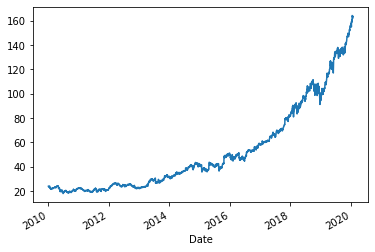

In [460]:
msftDf.Close.plot()

In [459]:
# Datetime Index
msftDf.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24'],
              dtype='datetime64[ns]', name='Date', length=2532, freq=None)

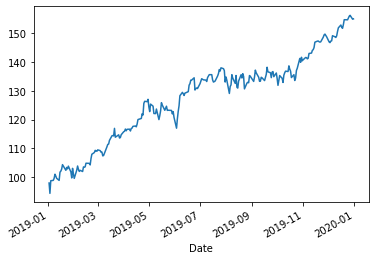

In [465]:
# We can take advantage of the Datetime Index
msftDf['2019'].Close.plot()

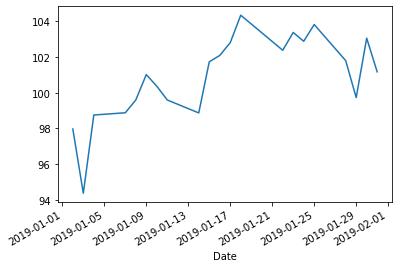

In [466]:
msftDf['2019-01'].Close.plot()

In [497]:
applData = yf.Ticker('AAPL')

applDf = applData.history(period='1d', start='2010-1-1', end='2020-1-25')

msftClose = msftDf.Close
applClose = applDf.Close

In [501]:
mergedDf = pd.DataFrame(msftClose).merge(pd.DataFrame(applClose),on='Date')
mergedDf.columns = ['Microsoft', 'Apple']

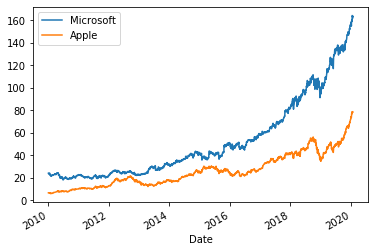

In [502]:
mergedDf.plot()

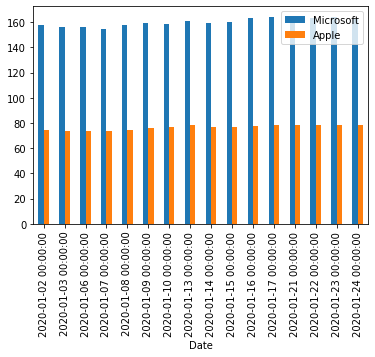

In [511]:
ax = mergedDf['2020-01'].plot.bar()